# Forming system of differential Equation from physical problem

# Problem
A ball is released from a height in three different fluids with drag coefficient $b=1kgs^-1,1.5kgs^-1$ and  $2kgs^-1$. Drag force is directly proportional to the instantaneous velocity of the ball. Determine the position (vertical distance) of the ball at each second from $t=0s$ to $t=100s$. Take,
 $gravity, g=9.8ms^-2$ ;  $mass, m=1kg$

# Modelling
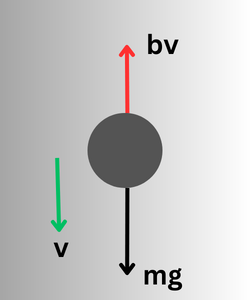


Let, $y(t)$ is vertical position of the ball at time $t$.

$v(t)$ is the vertical velocity of the ball at time $t$.

Here, Drag force is directly proportional to instantaneous velocity of the ball.

$F_D∝v$

$F_D=bv$

The gravity force exerts on the ball:

$F_G=mg$

Net force exerts on the ball:

$∑F=F_G-F_D$

According to Newton's second law of motion,
$∑F=ma$.

So, $ma=F_G-F_D$

or, $ma=mg-bv$

or, $a=g-\frac{b}{m}v$

or, $d^2y/dt^2=g-\frac{b}{m}dy/dt$

This is a second order differential equation.



# Convert the 2nd order ODE into two first order System of differential equations

$dy/dt=v$

$d^2y/dt^2=dv/dt$

The second order ode become,

$dv/dt=g-\frac{b}{m}v$

Two first order ODEs of the physical system are now,

{$dy/dt=v$ ,

$dv/dt=g-\frac{b}{m}v$}


# Solving Using odeint
Scipy **odeint** function is designed to handle first oder system of differential equations. Let's see how can we solve the system using **odeint**.

In [54]:
def falling_body(y,t,drag_coff):
  # unpack tuple y
  y,v=y
  gravity=9.8
  mass=1
  dydt=v
  dvdt=gravity-(drag_coff/mass)*v
  return [dydt, dvdt]

Initial conditions of the system:
$y(0)=0$

$y'(0)=v=0$

In [55]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

# Initial conditions
ini_conds=[0,0]
# Time at which positions will be determined
step= np.linspace(0,101,100)
drag_coff=[1,1.5,2]
result=[]
for drag in drag_coff:
  # Drag coefficient is passed as an additional argument in a tuple
  soln=odeint(falling_body,ini_conds,step,args=(drag,))
  '''Odeint returns a list of lists where each list contains the solution of both odes. The first one is the position at time t
     and second one is the velocity at time t'''
  print(f'The position of the object at different time for drag coefficient {drag} is:{soln[:,0]}')
  result.append(soln[:,0])


The position of the object at different time for drag coefficient 1 is:[  0.           3.73109637  11.46972624  20.65316046  30.35747855
  40.24958681  50.20939757  60.19361657  70.1866353   80.18282653
  90.18016152 100.17790884 110.17580481 120.17375441 130.17172334
 140.16969918 150.16767755 160.16565687 170.16363648 180.1616162
 190.15959598 200.15757576 210.15555555 220.15353535 230.15151515
 240.14949495 250.14747474 260.14545454 270.14343434 280.14141414
 290.13939394 300.13737374 310.13535353 320.13333333 330.13131313
 340.12929293 350.12727273 360.12525252 370.12323232 380.12121212
 390.11919192 400.11717172 410.11515151 420.11313131 430.11111111
 440.10909091 450.10707071 460.1050505  470.1030303  480.1010101
 490.0989899  500.0969697  510.09494949 520.09292929 530.09090909
 540.08888889 550.08686869 560.08484848 570.08282828 580.08080808
 590.07878788 600.07676768 610.07474747 620.07272727 630.07070707
 640.06868687 650.06666667 660.06464646 670.06262626 680.06060606
 690.05

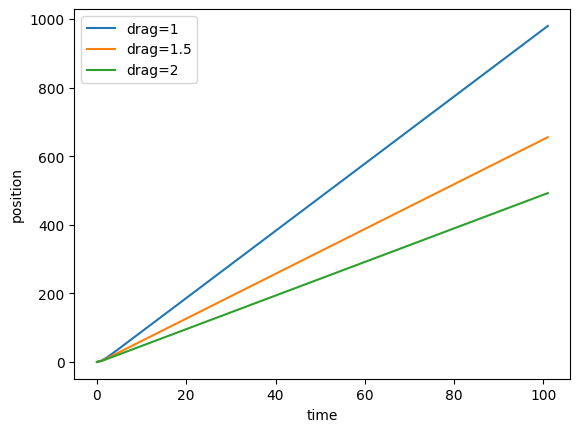

In [56]:
# Plot position against time for each drag coefficient
for i,drag in enumerate(drag_coff):
  plt.plot(step,result[i],label=f"drag={drag}")
  plt.xlabel(xlabel='time')
  plt.ylabel(ylabel='position')
  plt.legend()

# Solving system of differential equations using sympy

In [57]:
import sympy as sp
from sympy import *
t=symbols('t')
y=Function('y')
v=Function('v')
Eq1=Eq((diff(y(t),t,1)),v(t))
# Let's say drag_coefficient 1
Eq2=Eq(diff(v(t),t,1),9.8-Rational(1,1)*v(t))
display(Eq1)
display(Eq2)


Eq(Derivative(y(t), t), v(t))

Eq(Derivative(v(t), t), 9.8 - v(t))

In [58]:
# Define the system as a list of differential equations
system=[Eq1,Eq2]

In [59]:
# Define the intial conditions
boundary={y(t).subs(t,0):'0',sp.diff(y(t),t,1).subs(t,0):'0'}

In [60]:
sp.dsolve(system)

[Eq(y(t), 1.0*C1 - C2*exp(-t) + 9.8*t - 9.8), Eq(v(t), C2*exp(-t) + 9.8)]

In [61]:
soln=sp.dsolve(system,ics=boundary)

In [62]:
for i in range(2):
  display(soln[i])

Eq(y(t), 9.8*t - 9.8 + 9.8*exp(-t))

Eq(v(t), 9.8 - 9.8*exp(-t))

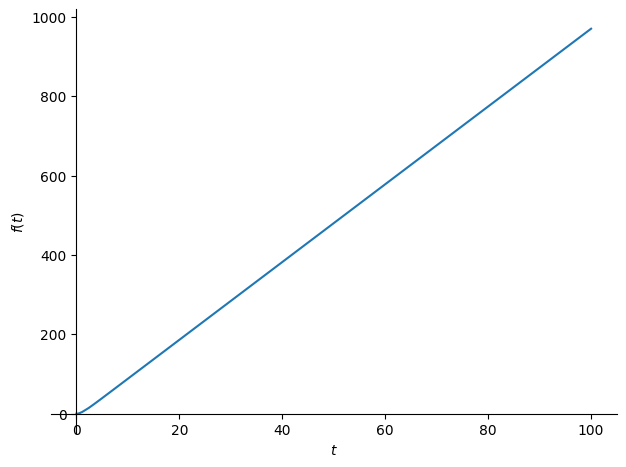

In [53]:
# Apparently we got same solution for drag coefficient 1 as we got while using odeint.
sp.plot(soln[0].rhs,(t,0,100))